In [1]:
import math
def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

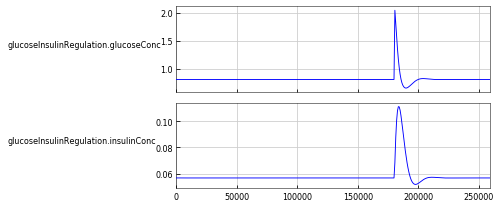

In [2]:
import fmpy
model1 = '../fmus/Metabolism.GlucoseInsulin.Test.GlucoseToleranceTest.fmu' 
result2 = result = fmpy.simulate_fmu(
    model1,
    start_time=0,
    stop_time=259200,
    step_size=720,
    record_events=False,
    output=['glucoseInsulinRegulation.glucoseConc','glucoseInsulinRegulation.insulinConc'],
    start_values={'glucoseInsulinRegulation.tissueUtilizationInsulinDependent.Nu_permu': 139000,'glucoseInsulinRegulation.insulinProduction.beta_mu': 1430},
    solver='CVode')
fmpy.util.plot_result(result2)

In [3]:
# Definujeme si vlastní rutinu pro vykreslení grafu (předchozí zabalíme do funkce plot())
def plot(x,y,z=None):
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig = plt.figure()
    plt.plot(x,y,'r')
    # if z is passed - make second plot in blue color
    if z is not None:
        plt.plot(x,z,'b')
    plt.show()

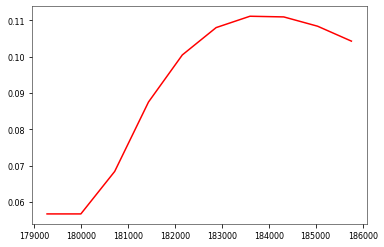

In [4]:
gy = result2['glucoseInsulinRegulation.glucoseConc'][249:259]
iy = result2['glucoseInsulinRegulation.insulinConc'][249:259]
time = result2['time'][249:259]
plot(time,iy)
#import random
#data = [] #numpy.array([])
#for i in range(0,100):
#    data.append(truncate(result2[i*10][2]+(result2[i*10][2]*random.random()*0.01),3))

In [5]:
gy

SimulationResult([0.81139171, 0.81139171, 2.04400569, 1.81253172,
                  1.57297754, 1.35362808, 1.16804788, 1.0192541 ,
                  0.90442374, 0.81842507])

In [6]:
time

SimulationResult([179280., 180000., 180720., 181440., 182160., 182880.,
                  183600., 184320., 185040., 185760.])

In [7]:
import numpy
import random
data = [] #numpy.array([])
# add some random error to data
for i in range(0,10):
    data.append(truncate((gy[i]+gy[i]*(random.random()-0.5)*0.01),3))
numpy.savetxt('PatientC_g.csv',data,fmt='%5.3f',delimiter=',',header='glucose concentration every 12 minutes (mg/ml)')
datai = [] #numpy.array([])
for i in range(0,10):
    datai.append(truncate((iy[i]+iy[i]*(random.random()-0.5)*0.01),3))
numpy.savetxt('PatientC_i.csv',datai,fmt='%5.3f',delimiter=',',header='insulin concentration every 12 minutes (mU/ml)')


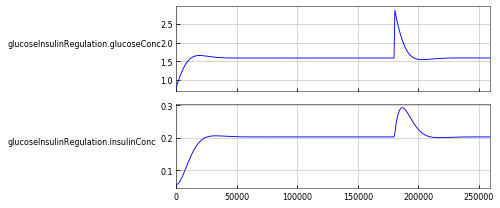

In [8]:
result3 = result = fmpy.simulate_fmu(
    model1,
    start_time=0,
    stop_time=259200,
    step_size=720,
    record_events=False,
    output=['glucoseInsulinRegulation.glucoseConc','glucoseInsulinRegulation.insulinConc'],
    start_values={'glucoseInsulinRegulation.tissueUtilizationInsulinDependent.Nu_permu': 139000/10,'glucoseInsulinRegulation.insulinProduction.beta_mu': 1430},
    solver='CVode')
fmpy.util.plot_result(result3)

In [9]:
gy3 = result3['glucoseInsulinRegulation.glucoseConc'][249:259]
iy3 = result3['glucoseInsulinRegulation.insulinConc'][249:259]
time3 = result3['time'][249:259]
data3 = [] #numpy.array([])
for i in range(0,10):
    data3.append(truncate((gy3[i]+gy3[i]*(random.random()-0.5)*0.01),3))
numpy.savetxt('PatientA_g.csv',data3,fmt='%5.3f',delimiter=',',header='glucose concentration every 12 minutes (mg/ml)')    
data3i = [] #numpy.array([])
for i in range(0,10):
    data3i.append(truncate((iy3[i]+iy3[i]*(random.random()-0.5)*0.01),3))
numpy.savetxt('PatientA_i.csv',data3i,fmt='%5.3f',delimiter=',',header='insulin concentration every 12 minutes (mU/ml)')

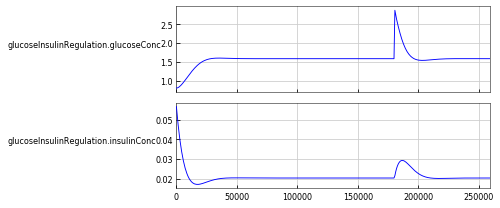

In [10]:
result3 = result = fmpy.simulate_fmu(
    model1,
    start_time=0,
    stop_time=259200,
    step_size=720,
    record_events=False,
    output=['glucoseInsulinRegulation.glucoseConc','glucoseInsulinRegulation.insulinConc'],
    start_values={'glucoseInsulinRegulation.tissueUtilizationInsulinDependent.Nu_permu': 139000,'glucoseInsulinRegulation.insulinProduction.beta_mu': 1430/10},
    solver='CVode')
fmpy.util.plot_result(result3)

In [11]:
gy3 = result3['glucoseInsulinRegulation.glucoseConc'][249:259]
iy3 = result3['glucoseInsulinRegulation.insulinConc'][249:259]
time3 = result3['time'][249:259]
data3 = [] #numpy.array([])
for i in range(0,10):
    data3.append(truncate((gy3[i]+gy3[i]*(random.random()-0.5)*0.01),3))
numpy.savetxt('PatientB_g.csv',data3,fmt='%5.3f',delimiter=',',header='glucose concentration every 12 minutes (mg/ml)')    
data3i = [] #numpy.array([])
for i in range(0,10):
    data3i.append(truncate((iy3[i]+iy3[i]*(random.random()-0.5)*0.01),3))
numpy.savetxt('PatientB_i.csv',data3i,fmt='%5.3f',delimiter=',',header='insulin concentration every 12 minutes (mU/ml)')